In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def draw_categorical_plot(data, figsize=(8, 6), colors=None):
    
    if not isinstance(data, pd.Series):
        raise ValueError("Input data should be a categorical data.")
    
    # Count the occurrences of each category in the data
    counts = data.value_counts()
    
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=figsize)
    
    # If there are less than 6 unique observations, draw a pie chart
    if len(counts) <= 5:
        counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=ax)
        ax.set_title("Pie Chart of " + data.name)
        ax.set_ylabel("")  # This is to remove the column name from the side of the pie chart
    else:
        # Otherwise, draw a bar chart
        sns.barplot(x=counts.index, y=counts.values, palette=colors, ax=ax)
        ax.set_title("Bar Chart of " + data.name)
        ax.set_ylabel("Count")
    
    plt.tight_layout()
    plt.show()  # Display the plot

In [4]:
def plot_data(df, numeric_col, category_col=None):
    plt.figure(figsize=(10, 8))
    
    # Plotting histogram using seaborn
    sns.histplot(data=df, x=numeric_col, kde=True, hue=category_col)
    
    plt.title(f'Distribution of {numeric_col}')
    plt.ylabel('Frequency')
    plt.xlabel(numeric_col)
    plt.show()

In [5]:
# For Numeric data
def draw_numeric_plot(data):
    
    num_unique = data.nunique()
    
    if num_unique == 2:
        # Donut chart
        plt.figure(figsize=(8, 6))
        # Extract the value counts and labels
        counts = data.value_counts()
        labels = counts.index

        # Plot
        wedges, texts, autotexts = plt.pie(counts, labels=labels, wedgeprops=dict(width=0.4), 
                                           autopct='%1.1f%%', startangle=140, pctdistance=0.85)
    
        # Draw center circle for 'donut' style
        centre_circle = plt.Circle((0,0),0.70,fc='white')
        plt.gca().add_artist(centre_circle)

        # Improve text visibility
        for text, autotext in zip(texts, autotexts):
            text.set(size=12)
            autotext.set(size=12)

        plt.title(f"Donut Chart of {data.name}")
        plt.ylabel("")  # Remove automatic label
        plt.legend(loc="best")  # Display a legend
    
    elif 3 <= num_unique <= 50:
        # Bar chart
        plt.figure(figsize=(12, 6))
        data.value_counts().sort_index().plot(kind='bar', color='skyblue')
        plt.title(f"Bar Chart for {data.name}")
        plt.ylabel("Frequency")
        plt.xlabel(data.name)
    
    elif 51 <= num_unique < 90:
        # Simple histogram
        plt.figure(figsize=(12, 6))
        plt.hist(data, bins=30, edgecolor='black', color='skyblue')
        plt.title(f"Histogram of {data.name}")
        plt.ylabel("Frequency")
        plt.xlabel(data.name)
    
    elif num_unique >= 90:
        # Histogram and boxplot
        fig, ax = plt.subplots(1, 2, figsize=(15, 6))
        
        ax[0].hist(data, bins=30, edgecolor='black', color='skyblue')
        ax[0].set_title(f"Histogram of {data.name}")
        ax[0].set_ylabel("Frequency")
        ax[0].set_xlabel(data.name)
        
        ax[1].boxplot(data, vert=False)
        ax[1].set_title(f"Boxplot of {data.name}")
        ax[1].set_yticklabels([data.name])
    
    plt.tight_layout()
    plt.show()


# Data loading

In [6]:
df1 = pd.read_csv("/kaggle/input/telecom-churn-datasets/churn-bigml-80.csv")
df2 = pd.read_csv("/kaggle/input/telecom-churn-datasets/churn-bigml-20.csv")

In [7]:
df = pd.concat([df1, df2], ignore_index=True)

In [8]:
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
9,RI,74,415,No,No,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [12]:
print('Uniqueness of each column::')
df.nunique()

Uniqueness of each column::


State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [13]:
print("shape of the data :",df.shape)

shape of the data : (3333, 20)


In [14]:
for col in df.select_dtypes("object").columns:
    print("-"*25, f"\n{col} Column\n", "-"*25)
    display(df[col].value_counts())

------------------------- 
State Column
 -------------------------


State
WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
UT     72
TX     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
CO     66
NV     66
WA     66
MA     65
RI     65
MS     65
AZ     64
MO     63
FL     63
ND     62
NM     62
ME     62
NE     61
DE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

------------------------- 
International plan Column
 -------------------------


International plan
No     3010
Yes     323
Name: count, dtype: int64

------------------------- 
Voice mail plan Column
 -------------------------


Voice mail plan
No     2411
Yes     922
Name: count, dtype: int64

#
# EDA
## Overview of Combined Dataset
The combined dataset provides us with a detailed view of the customer's interactions and choices related to the Orange Telecom services. By delving into this dataset, we aim to gain a clearer understanding of the distribution of different features and ascertain any discernible patterns or trends.

## Distribution of Churn and Non-Churn Customers
Churn analysis is at the heart of our exploration, as it directly pertains to the primary objective of understanding and reducing customer attrition.

**Churn Status:**

- **False (Didn't Churn):** 2,850 customers
- **True (Churned):** 483 customers

From the preliminary data, we can observe that a vast majority of customers have chosen to stay with the service, whereas a smaller fraction have decided to churn. This distribution sets the stage for a deeper dive into understanding the reasons behind these decisions.

## Service Plans Distribution

**Voice Mail Plan:**

- **Subscribed (Yes):** 922 customers
- **Not Subscribed (No):** 2,411 customers

**International Plan:**

- **Subscribed (Yes):** 323 customers
- __Not Subscribed (No):__ 3,010 customers
- 
The data suggests a larger preference towards not subscribing to both the Voice Mail and International plans. The reasons for these choices could be manifold - cost considerations, perceived value, or other alternatives. A more in-depth analysis could reveal insights about customer preferences.

## State-wise Distribution

The dataset spans customers from 51 unique states, such as 'KS', 'OH', and 'NJ', to name a few. Given the broad geographical coverage, understanding state-wise churn trends could provide insights into regional preferences or challenges.
#

In [15]:
print('Description of the Categorical Dataset:')
df.describe(include=['object', 'bool']).T

Description of the Categorical Dataset:


,count,unique,top,freq
State,3333,51,WV,106
International plan,3333,2,No,3010
Voice mail plan,3333,2,No,2411
Churn,3333,2,False,2850


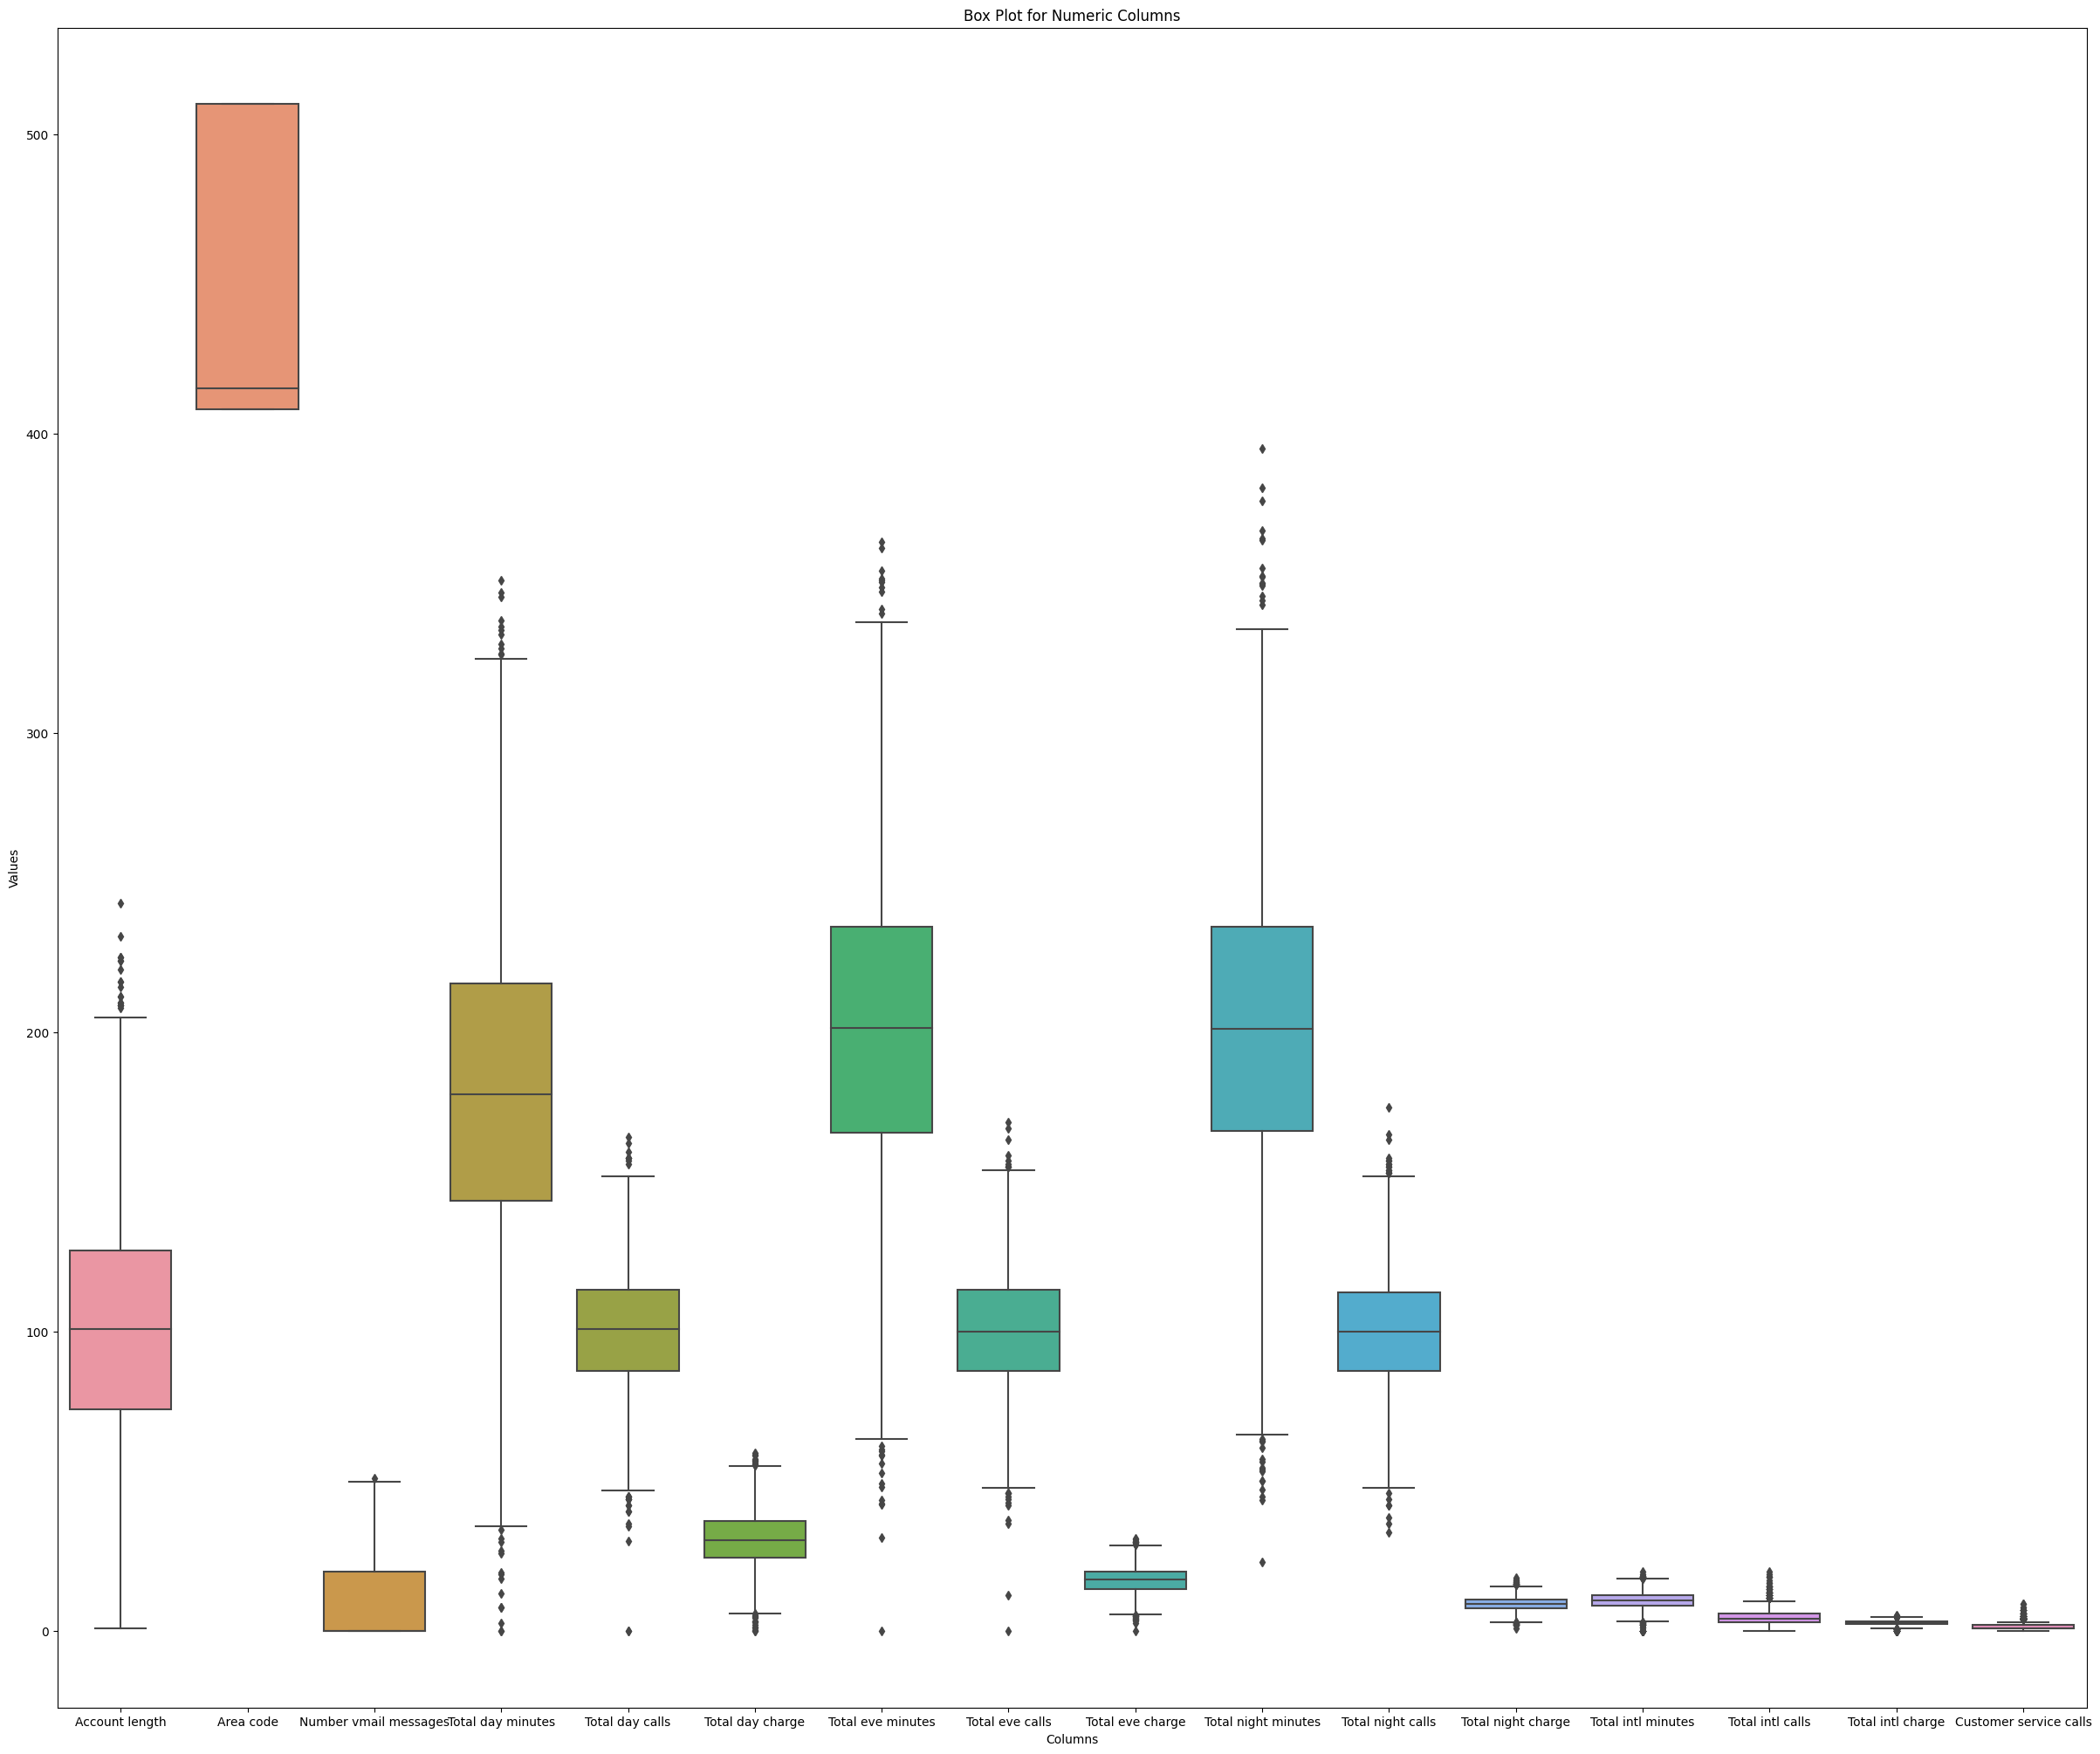

In [16]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Set up the matplotlib figure
plt.figure(figsize=(30, 25))

# Create box plots for all numeric columns
sns.boxplot(data=numeric_columns)

# Add title and labels
plt.title('Box Plot for Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

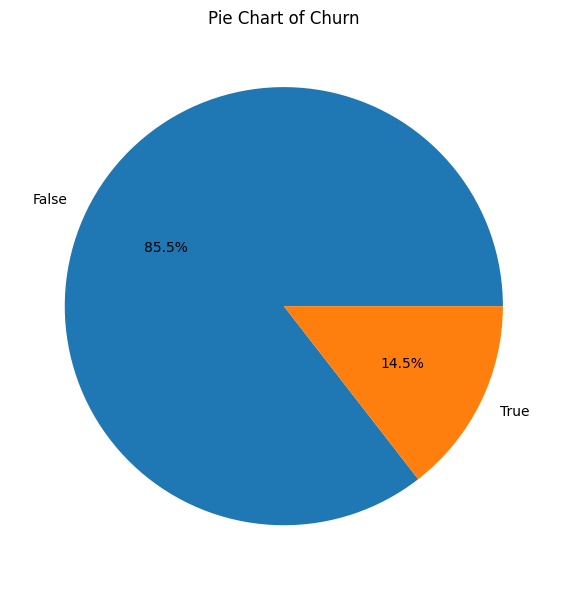

In [17]:
draw_categorical_plot(df['Churn'])


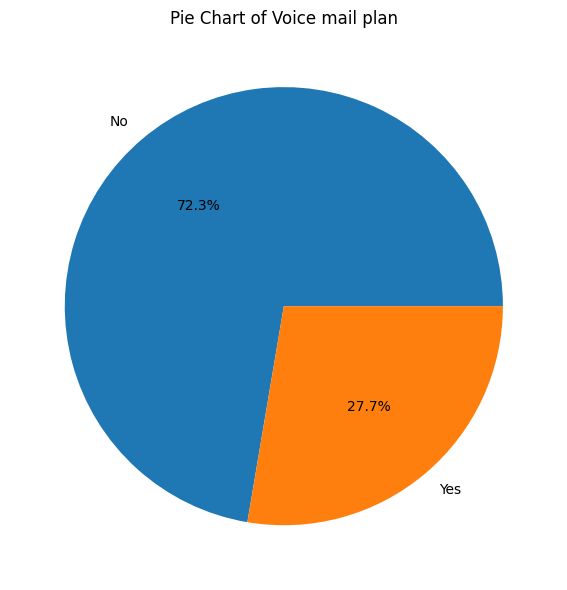

In [18]:
draw_categorical_plot(df['Voice mail plan'])


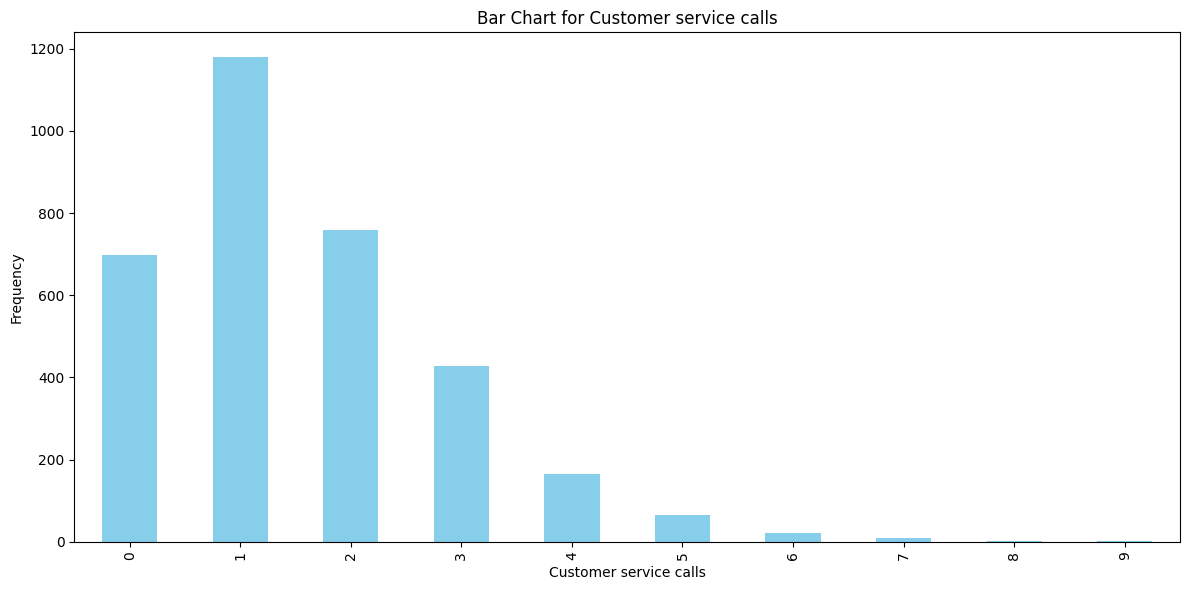

In [19]:
draw_numeric_plot(df['Customer service calls'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


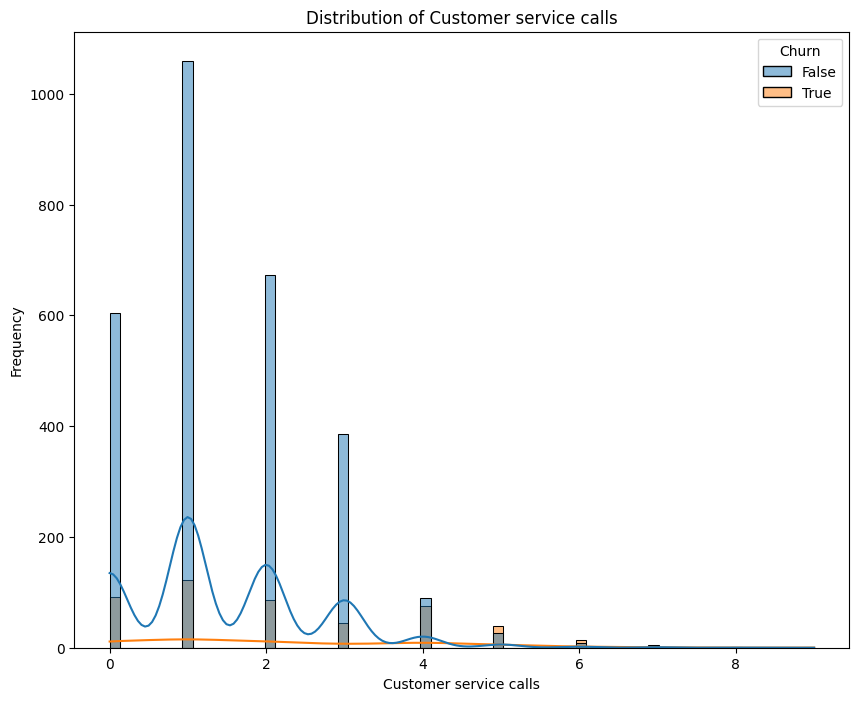

In [20]:
plot_data(df, 'Customer service calls', 'Churn')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


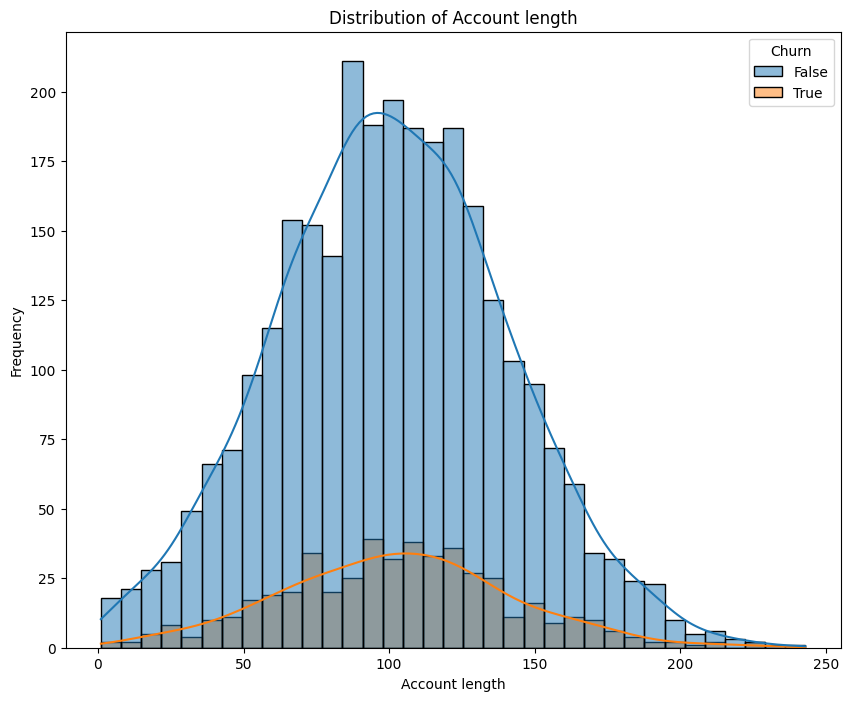

In [21]:
plot_data(df, 'Account length', 'Churn')


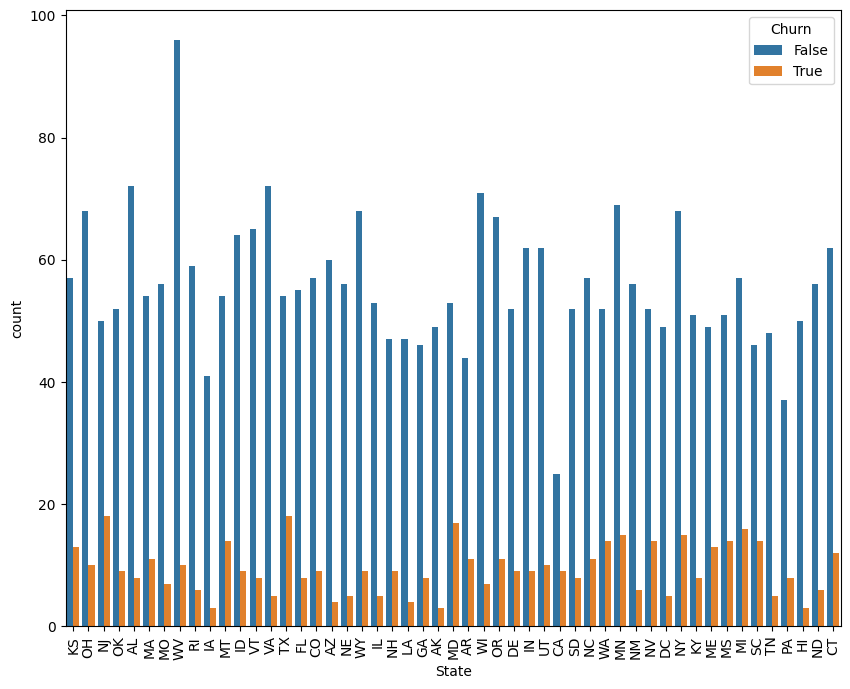

In [22]:
plt.figure(figsize=(10, 8))
sns.countplot(x='State', hue='Churn', data=df)
plt.xticks(rotation=90)
plt.show()

#### Total International Records

**Total intl minutes:** This metric provides insights into the duration of international calls. Specifically, it represents the cumulative minutes a customer has spent on overseas calls.

__Total intl calls:__ This signifies the frequency of international interactions, reflecting the total number of international calls initiated by a customer.

__Total intl charge:__ A representation of the financial aspect, this denotes the total expenses or charges borne by a customer due to their international call usage

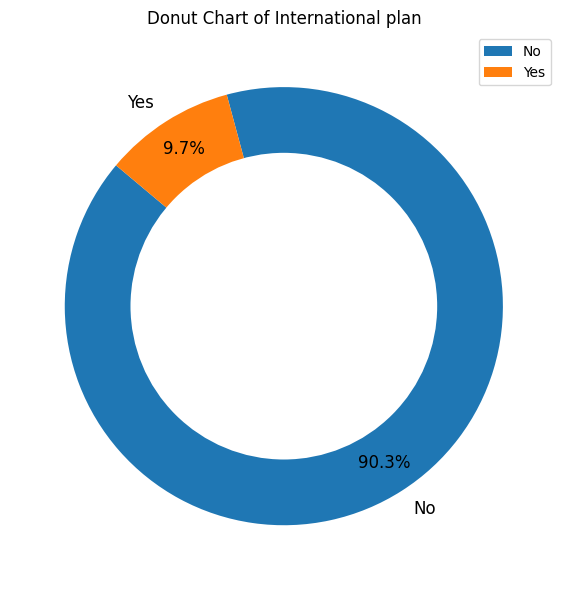

In [23]:
draw_numeric_plot(df['International plan'])


<Axes: xlabel='International plan', ylabel='count'>

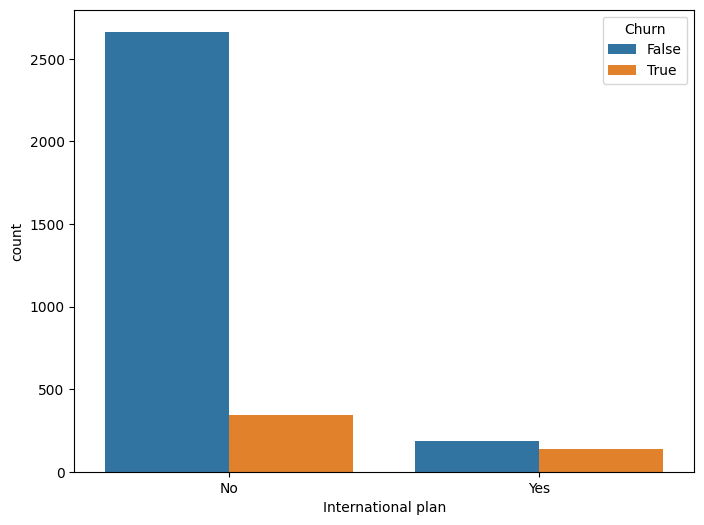

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x = 'International plan', hue = 'Churn')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


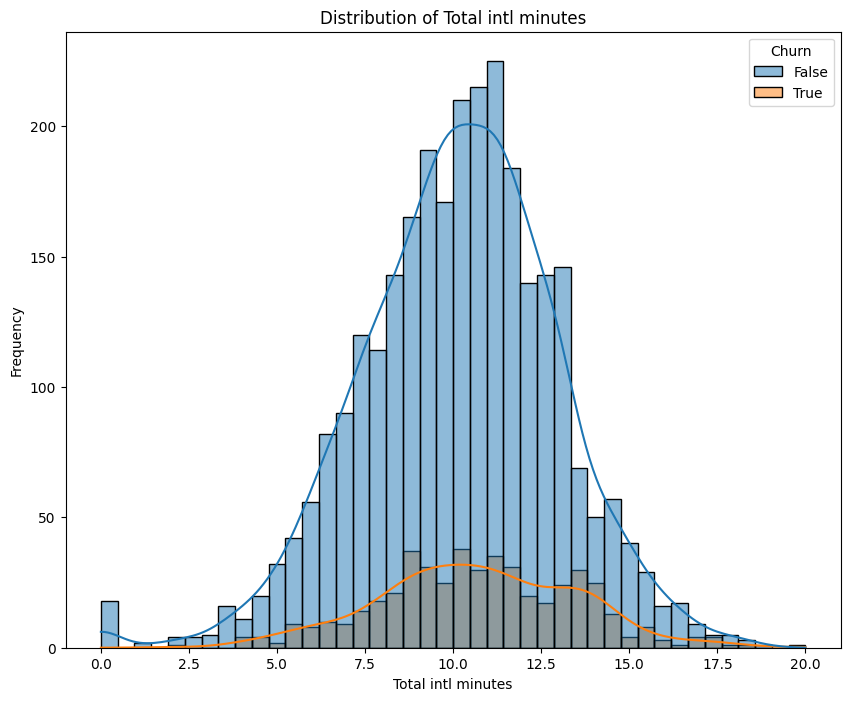

In [25]:
plot_data(df, 'Total intl minutes', 'Churn')


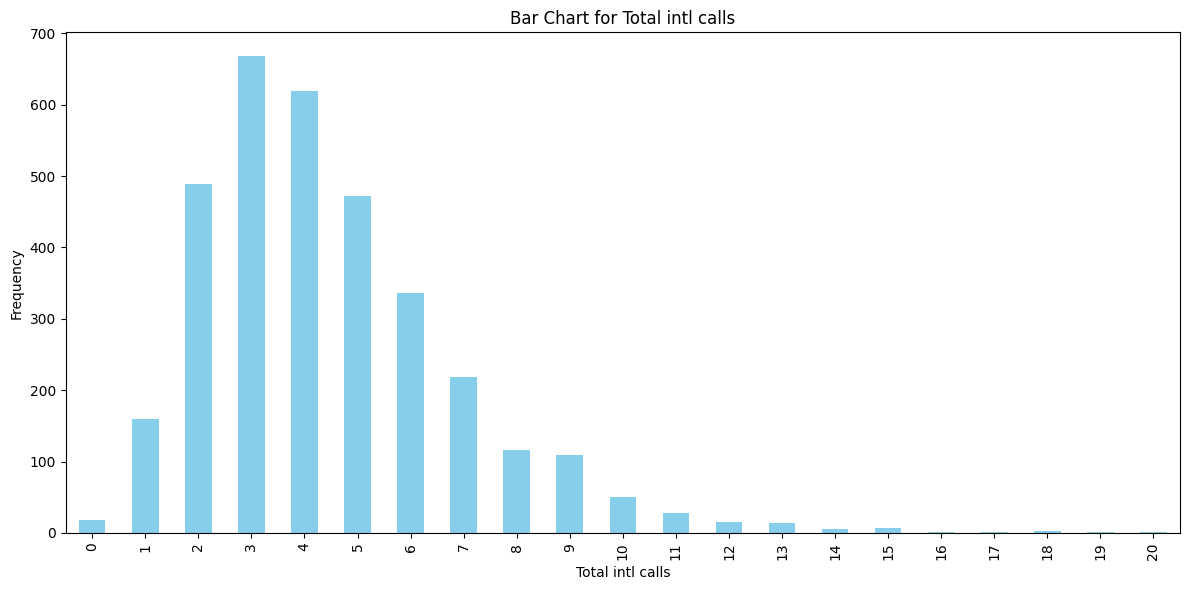

In [26]:
draw_numeric_plot(df['Total intl calls'])


#
# Feature Selection and Engineering

## Identifying Relevant Features
Recognizing the relevance of each feature ensures a streamlined model that's both efficient and effective.

__Steps:__

1. __Statistical Tests:__ Engage statistical methodologies like the chi-squared test for understanding the relationship between categorical features and the target variable.

2. __Domain-specific Features:__ Incorporating domain knowledge aids in refining feature selection. For example, if customers making a high number of service calls correlate with higher churn, one could introduce a binary feature to capture this relationship.

3. __Binning:__ In future works, a notable strategy is binning, such as converting continuous variables like the State into categorical ones. This can unveil non-linear relationships that might otherwise remain obscured.



## Anomaly Detection
Uncovering anomalies is essential, as outliers can influence model performance and mislead predictive patterns.

__Steps:__ 

1. __IQR (Interquartile Range):__ A popular statistical approach to identify outliers. It determines data points by gauging the dispersion of the data. Anomalies are those that fall outside the established range, typically demarcated by 1.5 times the IQR above the third quartile or below the first quartile.



## Correlation and Feature Importance
Deciphering inter-feature relationships and their correlation with 'Churn' is fundamental for informed modeling.

__Steps:__

1. __Correlation Matrix:__ This visual tool elucidates linear associations between features. Notably, features manifesting robust correlations with 'Churn' become central to the modeling process. Conversely, those exhibiting high mutual correlations might be redundant, offering avenues for model simplification.

2. __Feature Importance Plot:__ Advanced algorithms, like Random Forest, bestow the capability to rank features by importance. Visualizing these rankings crystallizes which attributes significantly influence churn predictions, informing strategy and intervention pathways.

#

In [27]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


#
__Statistical Tests:__ Use statistical tests to determine the relationship between each feature and the target variable. For instance, the chi-squared test can be used for categorical features.

__The Chi-squared tests indicate:__

- __State vs. Churn:__ P-value of 0.0023 suggests that the customer's state has a statistically significant association with churn status.
- __International plan vs. Churn:__ An extremely low p-value (2.49e-50) shows a strong association between having an international plan and churning.
- __Voice mail plan vs. Churn:__ The p-value (5.15e-09) also suggests a strong relationship between having a voice mail plan and the likelihood to churn.
In summary, both the international plan and voice mail plan have pronounced associations with churn, while regional differences (State) also seem to play a role.
#

In [28]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Voice mail plan'], df['Churn'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 34.13166001075673
P-value: 5.15063965903898e-09


In [29]:
contingency_table = pd.crosstab(df['International plan'], df['Churn'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 222.5657566499376
P-value: 2.4931077033159556e-50


In [30]:
# Using 'Voice mail plan' as the categorical feature and 'Churn' as the target
contingency_table = pd.crosstab(df['State'], df['Churn'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 83.04379191019663
P-value: 0.002296221552011188


#
### __Anomaly Detection__ 
In our data exploration phase, detecting anomalies or outliers is crucial, as they can skew the results of the analysis and influence the performance of machine learning models.

- __Method:__ We employed the Interquartile Range (IQR) method. By calculating the IQR (which is the range between the first quartile (25%) and the third quartile (75%) in the data), we can determine the variability beyond the limits of the whiskers in a box plot.

- __Findings:__ Based on the IQR method, we identified 529 rows in our dataset containing outliers.
#

In [31]:
numeric_df = df.select_dtypes(include=[np.number])  # Filter numeric columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Align DataFrame and bounds for comparison
df_aligned, IQR_low_aligned = numeric_df.align(Q1 - 1.5 * IQR, axis=1)
_, IQR_high_aligned = numeric_df.align(Q3 + 1.5 * IQR, axis=1)

# Apply the IQR formula to detect outliers
outliers_df = ((df_aligned < IQR_low_aligned) | (df_aligned > IQR_high_aligned))

# Check if any row contains at least one outlier
outliers = outliers_df.any(axis=1)

In [32]:
print(f"Number of rows containing outliers: {sum(outliers)}")

Number of rows containing outliers: 529


In [33]:
# Remove rows with any outliers
df = df[~outliers]

#
### __Correlation and Feature Importance__

Understanding the relationships and significance of different features relative to the target variable is vital. This not only aids in refining the model but also provides valuable insights into the underlying patterns in the data.

__Key Findings:__

- __International Calls:__ Demonstrates the strongest positive correlation with 'Churn' at 0.22. This suggests that as the number of international calls increases, the likelihood of churn also rises.

- __Customer Service Calls, Total Day Minutes & Total Day Charge:__ Each of these features exhibits a noteworthy positive correlation of around 0.2 with 'Churn'. This indicates that factors like longer daily usage or increased customer service interactions might elevate churn propensity.

- __Voice Mail Plan:__ This feature shows a negative correlation of -0.1 with 'Churn'. This implies that subscribers with a voice mail plan are slightly less likely to churn compared to those without one.

These correlations offer a guiding framework for the predictive modeling phase, highlighting which features might be especially influential in determining customer churn.
#

In [34]:
categorical_columns = ["Voice mail plan", "International plan"]
df[categorical_columns] = df[categorical_columns].replace({"No": 0, "Yes": 1})

<ipython-input-34-c3a8cc852b37>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[categorical_columns] = df[categorical_columns].replace({"No": 0, "Yes": 1})


In [35]:
df['Churn'] = df['Churn'].astype(int)
df['Churn']=df['Churn'].replace({"False":0,"True":1})

In [36]:
# Create a mapping dictionary
area_code_mapping = {
    415: 2,
    510: 1,
    408: 0
}

# Use the replace method to replace the values
df['Area code'] = df['Area code'].replace(area_code_mapping)

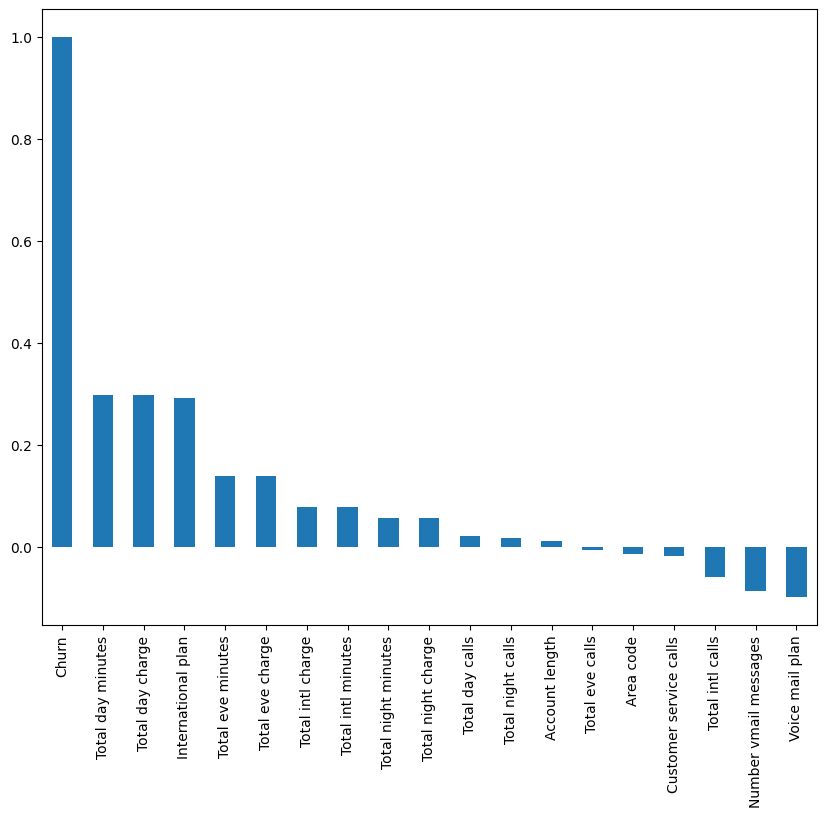

In [37]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation
target_corr = numeric_df.corr()['Churn'].sort_values(ascending=False)

# Plot the correlation
plt.figure(figsize=(10, 8))
target_corr.plot(kind='bar')
plt.show()

In [38]:
state = ['State']
df.drop(state, axis = 1, inplace = True)


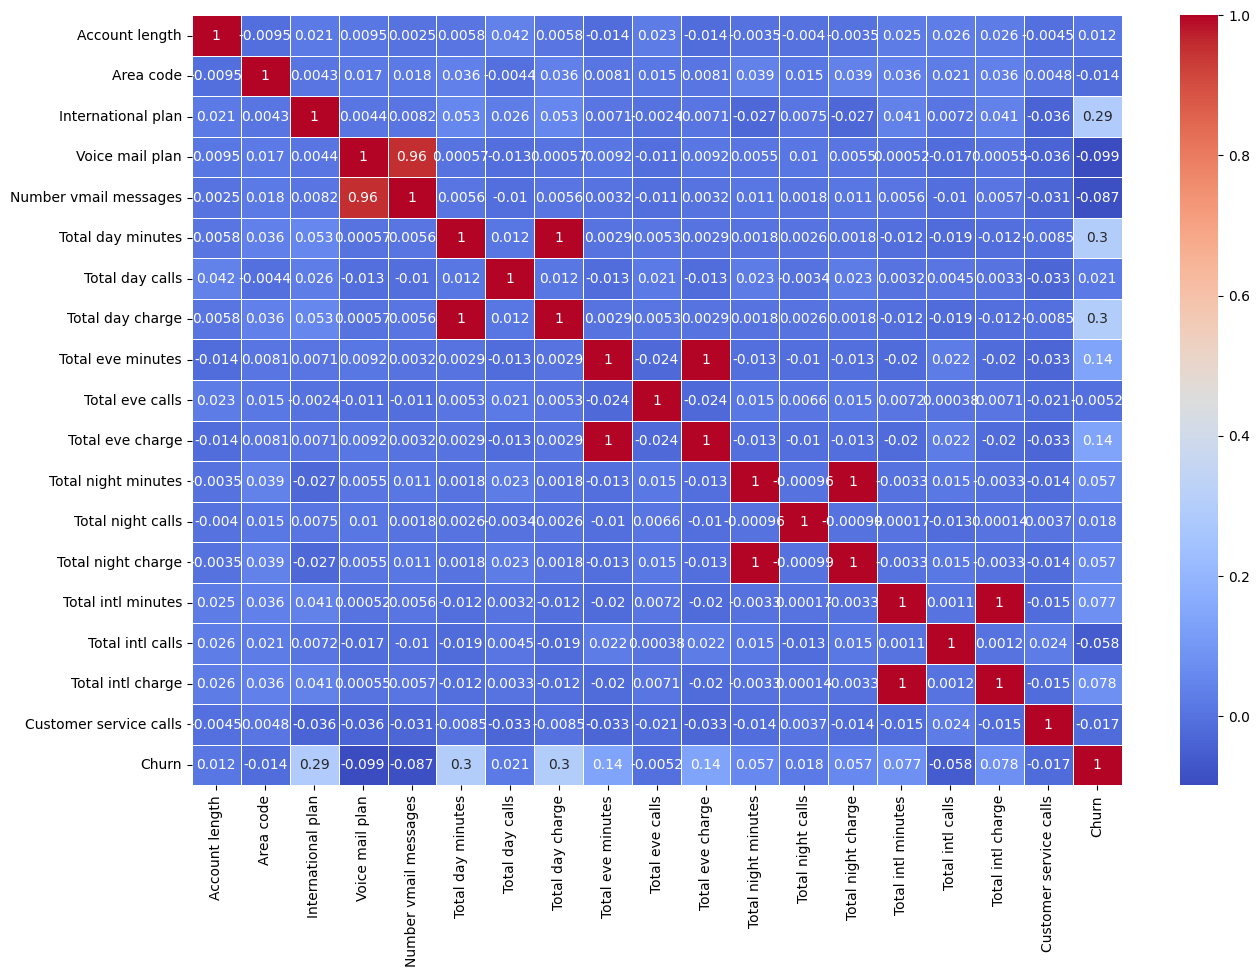

In [39]:
# Compute the correlation
corr = df.corr()

# Filter for high correlations
high_corr = corr[abs(corr) > 0.5].fillna(0)

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, linewidths=.5)
plt.show()

#
# Data Preprocessing
Data preprocessing plays a pivotal role in preparing the data for effective modeling. In this section, we address class imbalance with oversampling and delineate our data into training and testing sets.

## Oversampling:
- __Objective:__ Address class imbalance, which might otherwise influence model performance unfavorably.

- __Technique Used:__

    - __SMOTE__ (Synthetic Minority Over-sampling Technique): This technique creates synthetic instances of the minority class by considering the feature space, providing a balanced representation.
__Outcome:__ Post-SMOTE application, the 'Churn' feature distribution is:
   
- No Churn: 2137 samples
- Churn: 2137 samples


## Train-Test Split:
- __Objective:__ Ensure model generalization by training on one data subset and validating on another.

- __Procedure:__

    1. Opt for a 75-25 split. 75% of the data is earmarked for training, with the remaining 25% for validation.
    2. Implement train_test_split for randomized partitioning.
    3. Invoke the stratify parameter to maintain consistent 'Churn' distribution in both training and test datasets.
  #

#
 #### __Colinearity problem__
Several features have high correlation between them which are the following features __(Total day minutes, Total eve minutes, Total night minutes, Total intl minutes , Total day charge, Total eve charge, Total night charge, Total intl charge)__ will be reduced to four features, the first four features will be dropped
#


In [40]:
to_drop = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']

In [41]:
df.drop(to_drop, axis = 1, inplace = True)


In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)   # Features
y = df['Churn']                # Target variable

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42, stratify=y)
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)


#
# Model Development
## Pipeline:
The pipeline serves to automate the end-to-end process, orchestrating the flow from preprocessing stages to model training, ensuring uniform handling of data at every stage.

__RobustScaler:__ 

It scales features to diminish the impact of outliers. By working based on the median and interquartile range, it offers robustness against outlier effects.

- __Logistic Regression:__ This is a linear technique tailored for binary classification tasks, modeling the likelihood of a sample fitting into a designated class.

- __Random Classifier:__ Acting as a baseline classifier, its predictions are random, thereby setting a foundational performance metric.

- __Decision Tree Model:__ A transparent model that makes decisions reliant on feature values, crafting a tree-structured decision schema.

- __Gradient Boosting:__ An advanced ensemble methodology that progressively crafts trees. Each new tree seeks to amend the shortcomings of the prior one, often yielding enhanced accuracy.

__Note:__ A meticulous grid search was executed for the Random Forest and Gradient Boosting models to pinpoint the best hyperparameters. These optimal parameters are now integral to the pipeline, priming the models for peak performance.

__Final Model Selection:__ After evaluating the performance metrics of all models, the best-performing model will be chosen. This selected model will form the basis for our subsequent analyses and predictions moving forward.
#

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Logistic Regression Pipeline
logreg_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

# Random Forest Pipeline with the best parameters incorporated
rf_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', RandomForestClassifier(
        max_depth=20,
        min_samples_leaf=1,
        min_samples_split=10,
        n_estimators=50,
        random_state=42))
])

dt_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Gradient Boosting Pipeline with the best parameters incorporated
gb_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', GradientBoostingClassifier(
        learning_rate=0.5,
        max_depth=8,
        n_estimators=100,
        random_state=42))
])

# Train Logistic Regression
logreg_pipeline.fit(X_train, y_train)
logreg_predictions = logreg_pipeline.predict(X_test)

# Train Random Forest
rf_pipeline.fit(X_train, y_train)
rf_predictions = rf_pipeline.predict(X_test)

# Train Decision Tree
dt_pipeline.fit(X_train, y_train)
dt_predictions = dt_pipeline.predict(X_test)

# Train Gradient Boosting
gb_pipeline.fit(X_train, y_train)
gb_predictions = gb_pipeline.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, accuracy_score

# Predict using the models
logreg_predictions = logreg_pipeline.predict(X_test)
rf_predictions = rf_pipeline.predict(X_test)
dt_predictions = dt_pipeline.predict(X_test)
gb_predictions = gb_pipeline.predict(X_test)

# Generate classification reports
logreg_report = classification_report(y_test, logreg_predictions, output_dict=True)
rf_report = classification_report(y_test, rf_predictions, output_dict=True)
dt_report = classification_report(y_test, dt_predictions, output_dict=True)
gb_report = classification_report(y_test, gb_predictions, output_dict=True)

# Calculate accuracies
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)

# Determine the best model based on accuracy
accuracies = {
    'Logistic Regression': logreg_accuracy,
    'Random Forest': rf_accuracy,
    'Decision Tree': dt_accuracy,
    'Gradient Boosting': gb_accuracy
}

# Determine the best model based on accuracy
best_model_name = max(accuracies, key=accuracies.get)
best_model_pipeline = None  # Initialize this variable

if best_model_name == 'Logistic Regression':
    best_model_predictions = logreg_predictions
    best_model_pipeline = logreg_pipeline  # Set the pipeline
elif best_model_name == 'Random Forest':
    best_model_predictions = rf_predictions
    best_model_pipeline = rf_pipeline  # Set the pipeline
elif best_model_name == 'Decision Tree':
    best_model_predictions = dt_predictions
    best_model_pipeline = dt_pipeline  # Set the pipeline
elif best_model_name == 'Gradient Boosting':
    best_model_predictions = gb_predictions
    best_model_pipeline = gb_pipeline  # Set the pipeline

# Create the result_df DataFrame
result_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': best_model_predictions
})

print(f"The best model is {best_model_name} with an accuracy of {accuracies[best_model_name]:.2f}")

The best model is Gradient Boosting with an accuracy of 0.97


#
# Model Evaluation
Evaluating model performance is crucial to ensure our predictions are both accurate and reliable. We employ a series of metrics and techniques to critically assess how well our models have been trained and how they might perform on unseen data.

## Metrics and Tools:
- __Classification Report:__ This provides a comprehensive breakdown of performance metrics for each class, including precision, recall, f1-score, and support. It's a quick way to gauge overall model performance across categories.

- __Confusion Matrix:__ A table used to describe the performance of a classification model on a set of data for which the true values are known. It contrasts actual versus predicted classifications.

- __Precision-Recall Curve:__ A graphical representation that plots precision against recall for different thresholds. This curve showcases the trade-off between precision and recall for different threshold values and is particularly useful when classes are imbalanced.

## Performance Summary:
Post evaluation, we collate the critical metrics into a new dataframe for a side-by-side comparison. This dataframe lists:

- __Accuracy:__ The ratio of correctly predicted instances to the total instances.
  
- __Precision:__ The ratio of correctly predicted positive observations to the total predicted positives.

  
- __Recall (Sensitivity):__ The ratio of correctly predicted positive observations to all the observations in the actual class.

- __F1 Score:__ The weighted average of precision and recall.

#


In [46]:
def extract_metrics(report):
    """Extracts the desired metrics from the classification report."""
    return {
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score']
    }

# List of models and their reports
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']
reports = [logreg_report, rf_report, dt_report, gb_report]

# Populate metrics data using list comprehensions
metrics_data = {
    'Model': models,
    'Accuracy': [extract_metrics(report)['Accuracy'] for report in reports],
    'Precision': [extract_metrics(report)['Precision'] for report in reports],
    'Recall': [extract_metrics(report)['Recall'] for report in reports],
    'F1-score': [extract_metrics(report)['F1-score'] for report in reports]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics_data)

F1 Score: 0.8531

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.98       625
     Class 1       0.91      0.80      0.85        76

    accuracy                           0.97       701
   macro avg       0.94      0.90      0.92       701
weighted avg       0.97      0.97      0.97       701



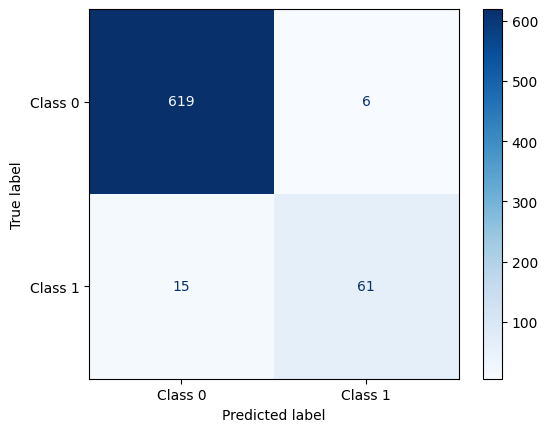

<Figure size 600x500 with 0 Axes>

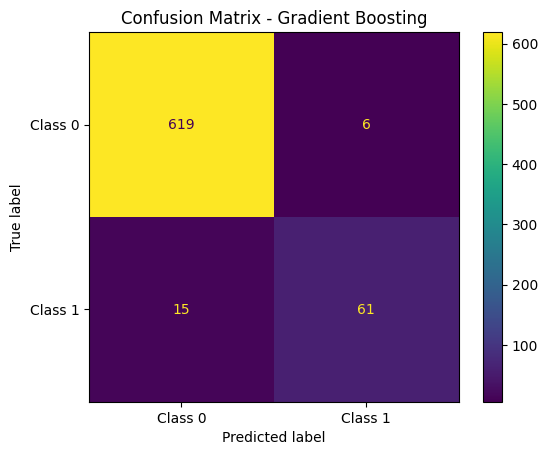

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score
import matplotlib.pyplot as plt

# Assuming gb_pipeline is your trained Gradient Boosting model
# X_test and y_test are your test features and labels

# Predict the labels for the test set
y_pred = gb_pipeline.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='binary')  # Use 'binary' for binary classification, or 'weighted'/'macro' for multi-class
print(f"F1 Score: {f1:.4f}")

# Display the classification report (which includes precision, recall, F1 score, and support)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(gb_pipeline, X_test, y_test, display_labels=['Class 0', 'Class 1'], cmap='Blues')
plt.figure(figsize=(6, 5))
disp.plot()
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

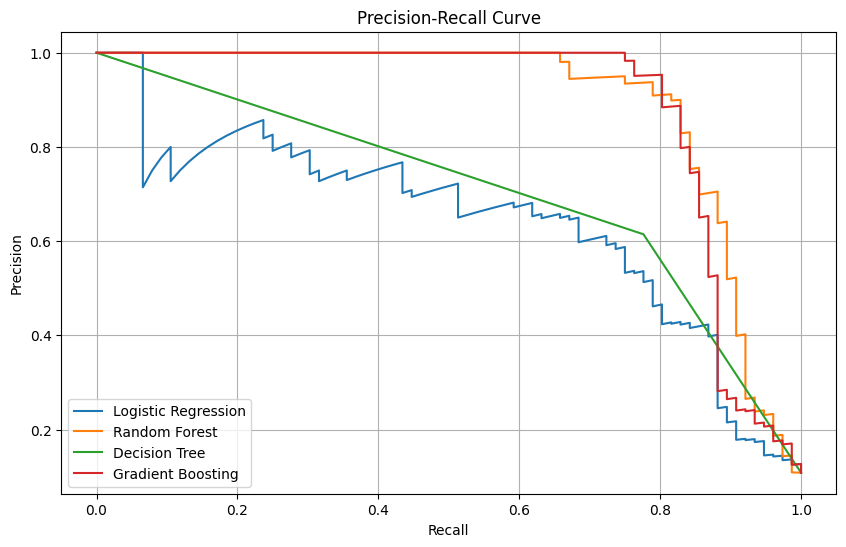

In [48]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve values for Logistic Regression
logreg_probs = logreg_pipeline.predict_proba(X_test)[:, 1]
logreg_precision, logreg_recall, _ = precision_recall_curve(y_test, logreg_probs)

# Compute Precision-Recall curve values for Random Forest
rf_probs = rf_pipeline.predict_proba(X_test)[:, 1]
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)

# Plot for Logistic Regression and Random Forest
plt.figure(figsize=(10, 6))
plt.plot(logreg_recall, logreg_precision, label='Logistic Regression')
plt.plot(rf_recall, rf_precision, label='Random Forest')

# Compute Precision-Recall curve values for Decision Tree
dt_probs = dt_pipeline.predict_proba(X_test)[:, 1]
dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt_probs)
plt.plot(dt_recall, dt_precision, label='Decision Tree')

# Compute Precision-Recall curve values for Gradient Boosting
gb_probs = gb_pipeline.predict_proba(X_test)[:, 1]
gb_precision, gb_recall, _ = precision_recall_curve(y_test, gb_probs)
plt.plot(gb_recall, gb_precision, label='Gradient Boosting')

# Other plot configurations
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
def color_cells(val):
    if val == metrics_df['F1-score'].max():
        color = 'green'
    elif val == metrics_df['F1-score'].min():
        color = 'orange'
    else:
        color = 'black'
    return f'color: {color}'

colored_df = metrics_df.style.map(color_cells, subset=['F1-score'])
colored_df

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.915835,0.904904,0.915835,0.902584
1,Random Forest,0.962910,0.963571,0.962910,0.959782
2,Decision Tree,0.922967,0.933162,0.922967,0.926820
3,Gradient Boosting,0.970043,0.969197,0.970043,0.969207


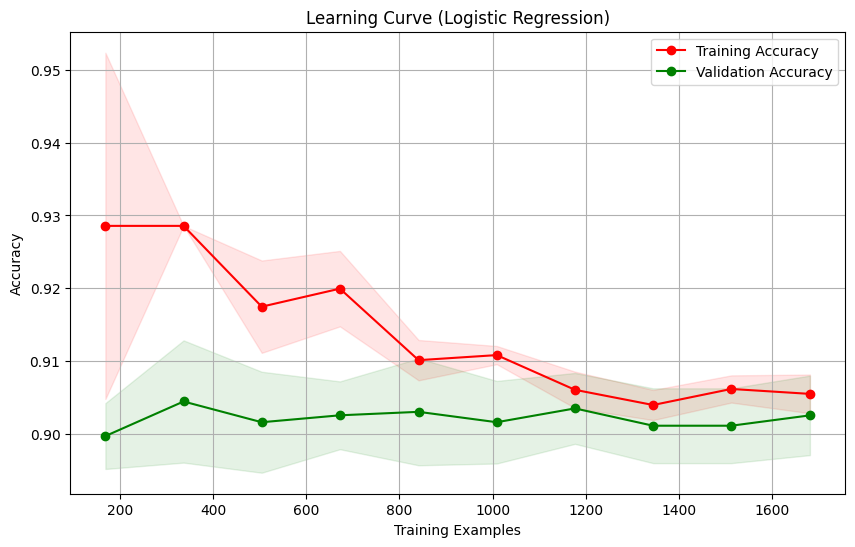

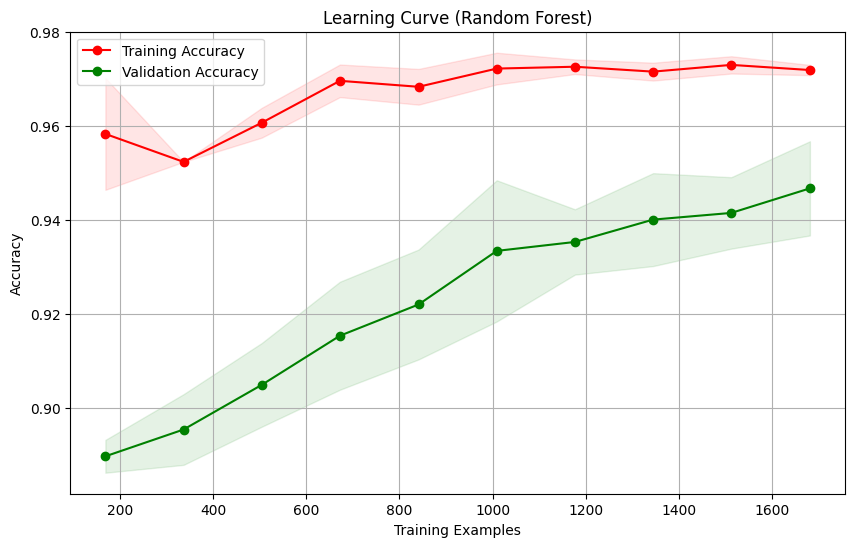

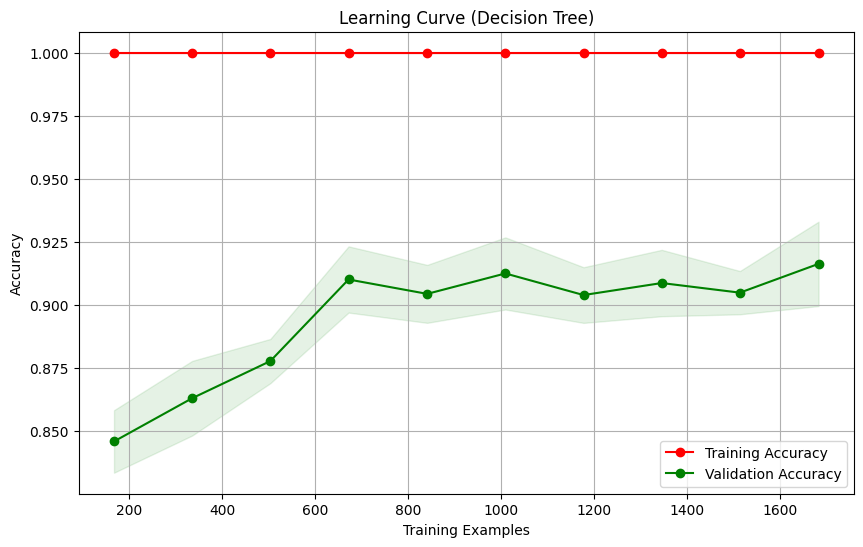

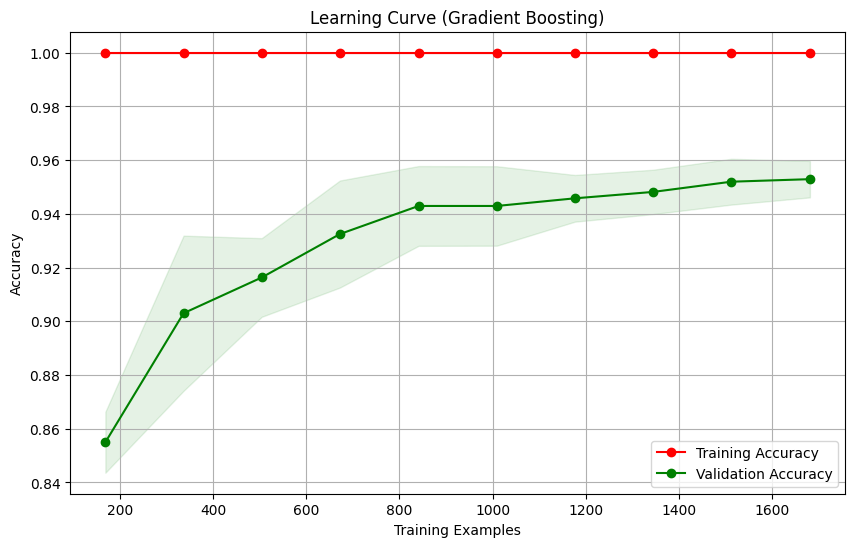

In [50]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Generate and plot the learning curve for a given estimator.
    """
    plt.figure(figsize=(10, 6))
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='accuracy', train_sizes=train_sizes
    )

    # Calculate mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Plot learning curves
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation Accuracy")

    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot learning curves for each model
plot_learning_curve(logreg_pipeline, "Learning Curve (Logistic Regression)", X_train, y_train)
plot_learning_curve(rf_pipeline, "Learning Curve (Random Forest)", X_train, y_train)
plot_learning_curve(dt_pipeline, "Learning Curve (Decision Tree)", X_train, y_train)
plot_learning_curve(gb_pipeline, "Learning Curve (Gradient Boosting)", X_train, y_train)


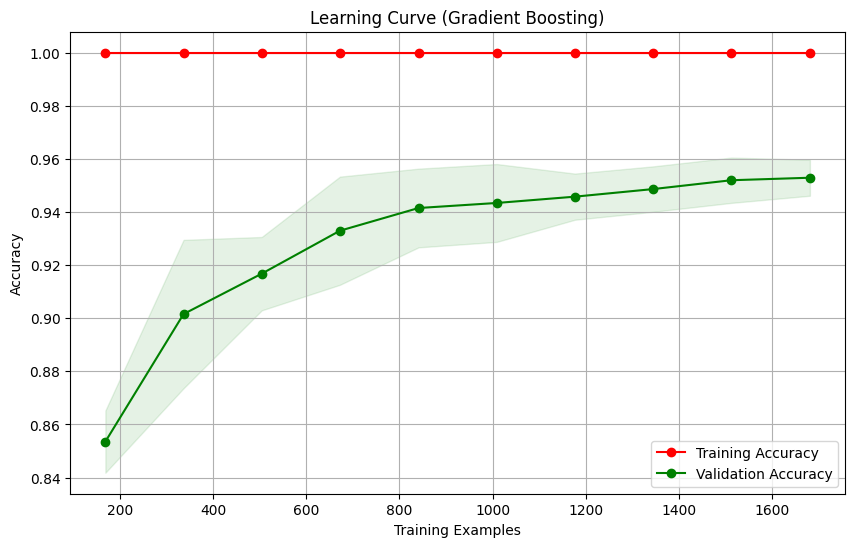

Training Accuracy: 1.0000
Test Accuracy: 0.9686
The model is generalizing well.


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your data ready (X_train, y_train, X_test, y_test)

# Define the Gradient Boosting model with your parameters
gb_model = GradientBoostingClassifier(
    learning_rate=0.5,
    max_depth=8,
    n_estimators=100,
    random_state=42
)

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Generate and plot the learning curve for a given estimator.
    """
    plt.figure(figsize=(10, 6))
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='accuracy', train_sizes=train_sizes
    )

    # Calculate mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Plot learning curves
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation Accuracy")

    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot the learning curve for Gradient Boosting
plot_learning_curve(gb_model, "Learning Curve (Gradient Boosting)", X_train, y_train)

# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Evaluate on the training set
train_predictions = gb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate on the test set
test_predictions = gb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Check for overfitting
if train_accuracy > test_accuracy + 0.05:  # Arbitrary threshold for significant overfitting
    print("The model is likely overfitting.")
else:
    print("The model is generalizing well.")